In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1281,2020-08-13,United Kingdom,313775.0,313798.0,46548.0,46706.0,-23.0,-158.0
1282,2020-08-13,Germany,219428.0,219964.0,9217.0,9211.0,-536.0,6.0
1283,2020-08-13,Iran,335061.0,333699.0,19031.0,18988.0,1362.0,43.0
1284,2020-08-13,Turkey,244239.0,244392.0,5886.0,5891.0,-153.0,-5.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  4898.765940902022
RMSE =  18085.491504226688


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  283.7861586314152
RMSE =  674.8374385207433


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  30872.20325203252
RMSE =  55708.93408951785
-- World performances for deaths --
MAE =  1530.6504065040651
RMSE =  1878.30855409601


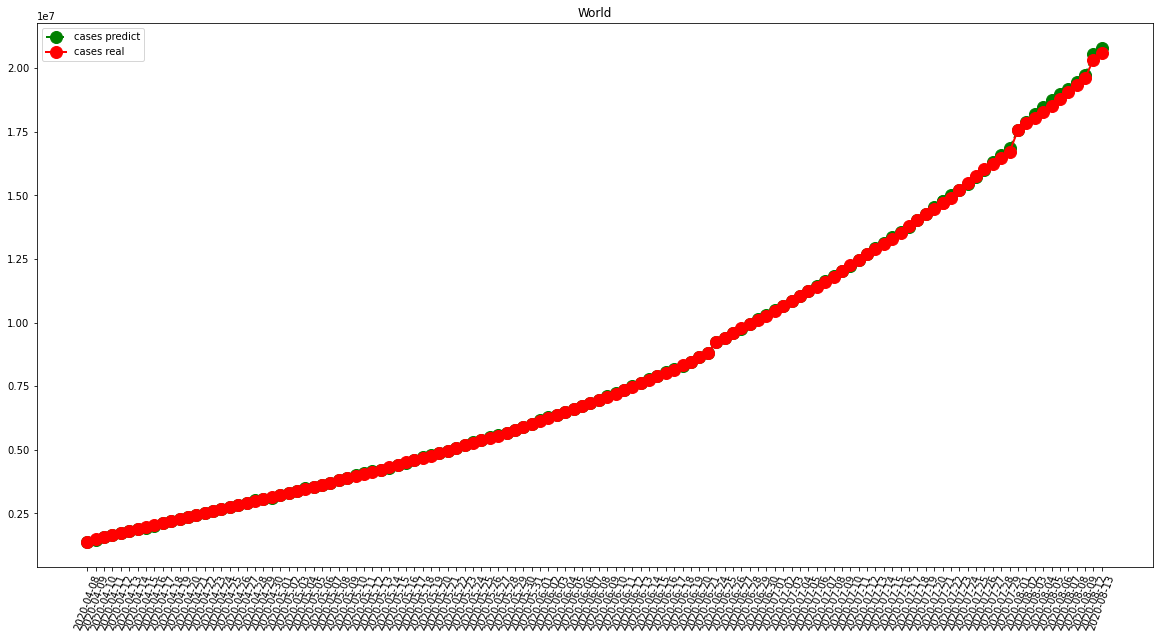

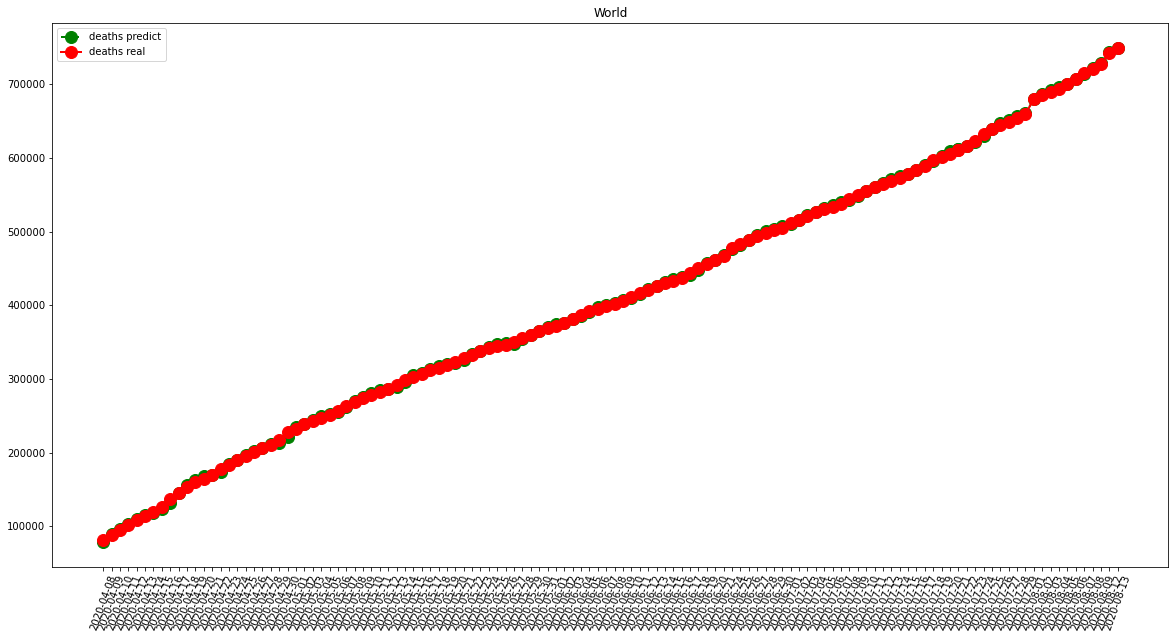

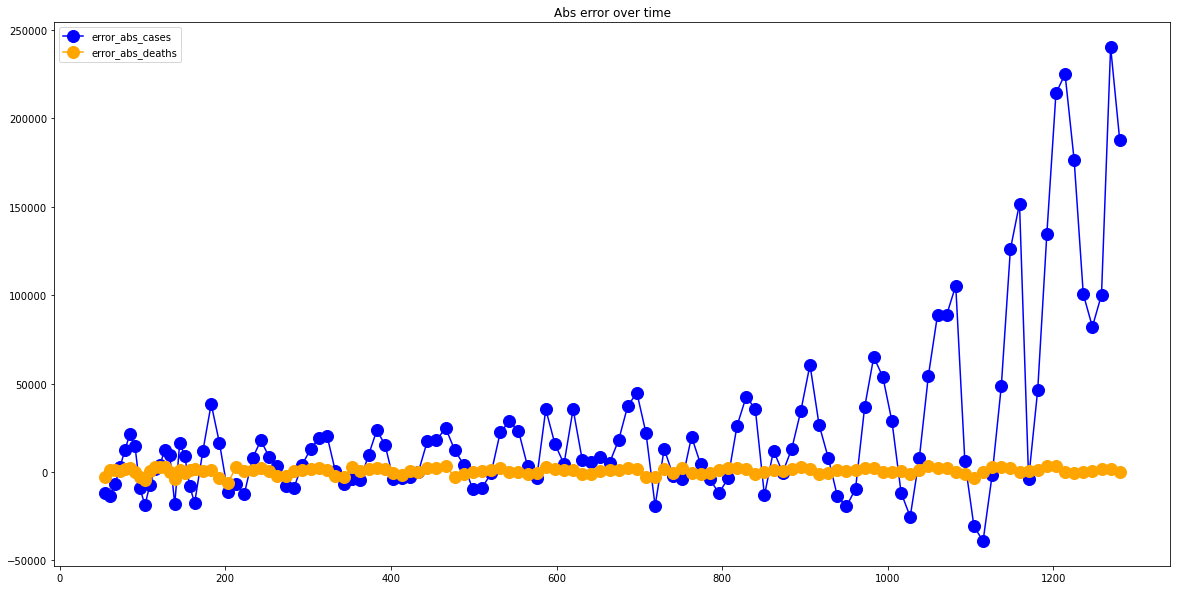

In [7]:
visShow("World")

-- France performances for cases --
MAE =  880.0300751879699
RMSE =  1371.9641537218617
-- France performances for deaths --
MAE =  137.49624060150376
RMSE =  290.70038576808645


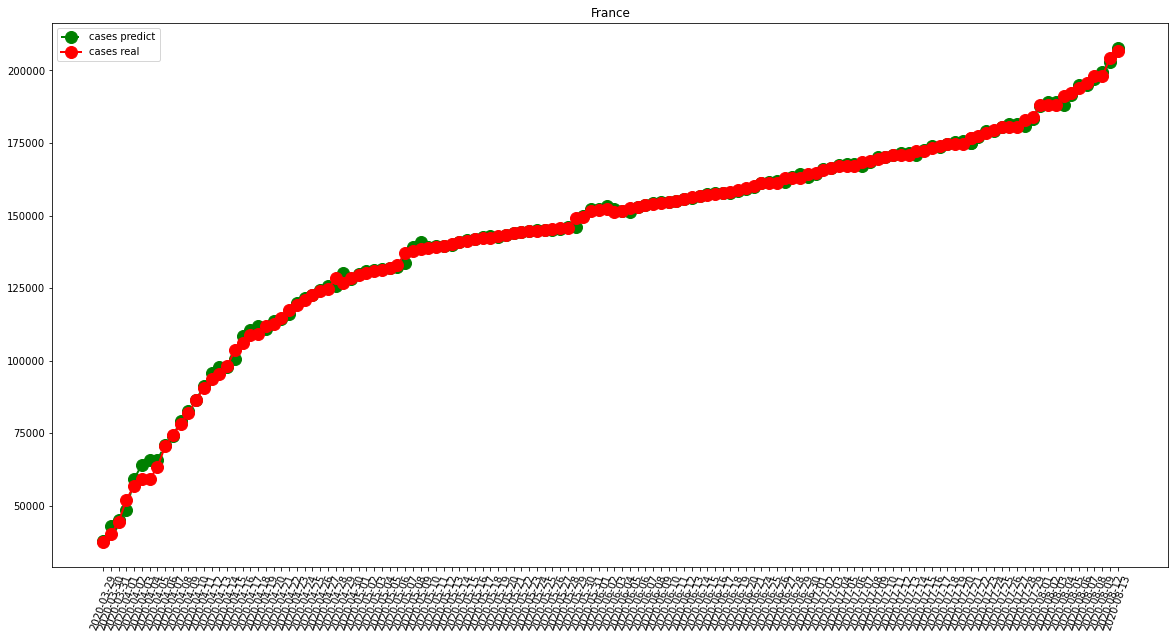

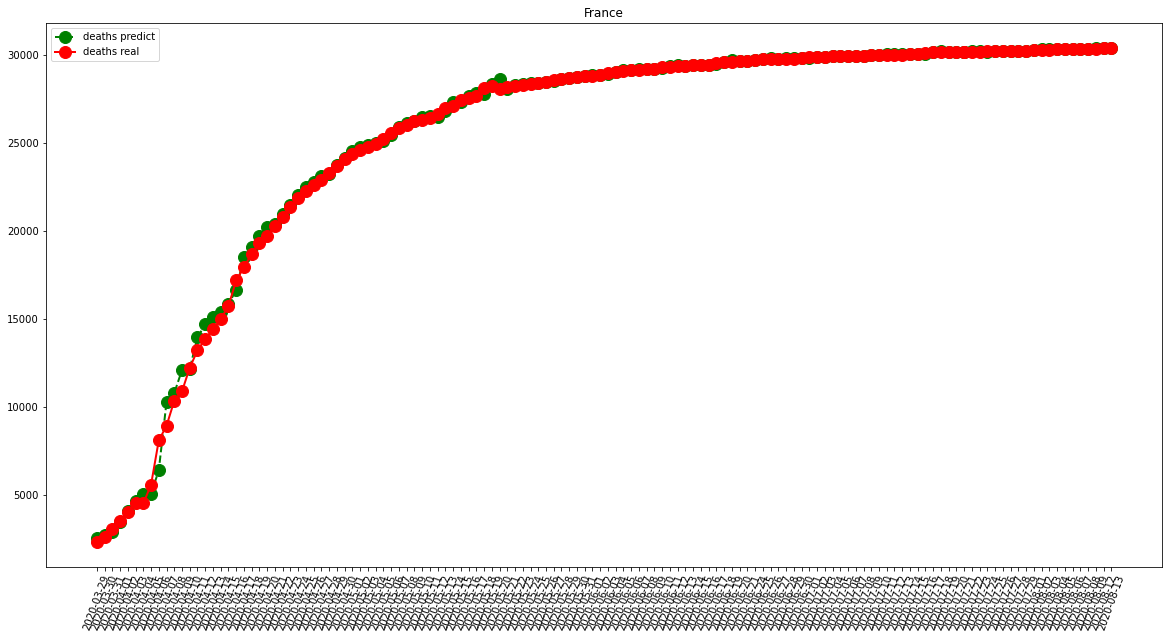

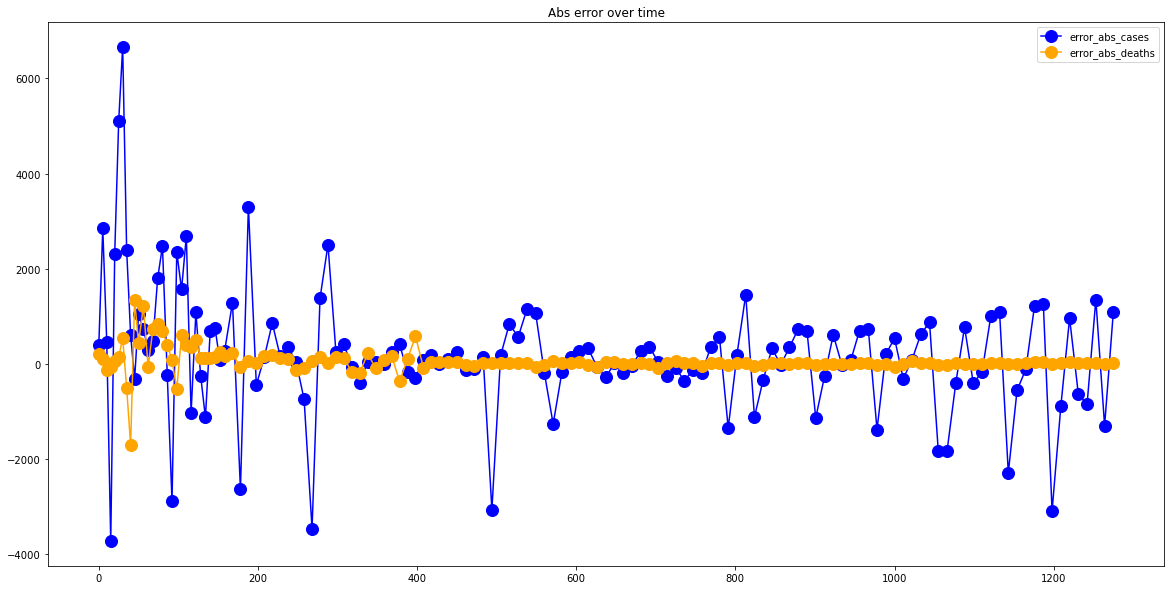

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  312.3157894736842
RMSE =  475.8502007290053
-- Italy performances for deaths --
MAE =  78.96992481203007
RMSE =  256.7008293509658


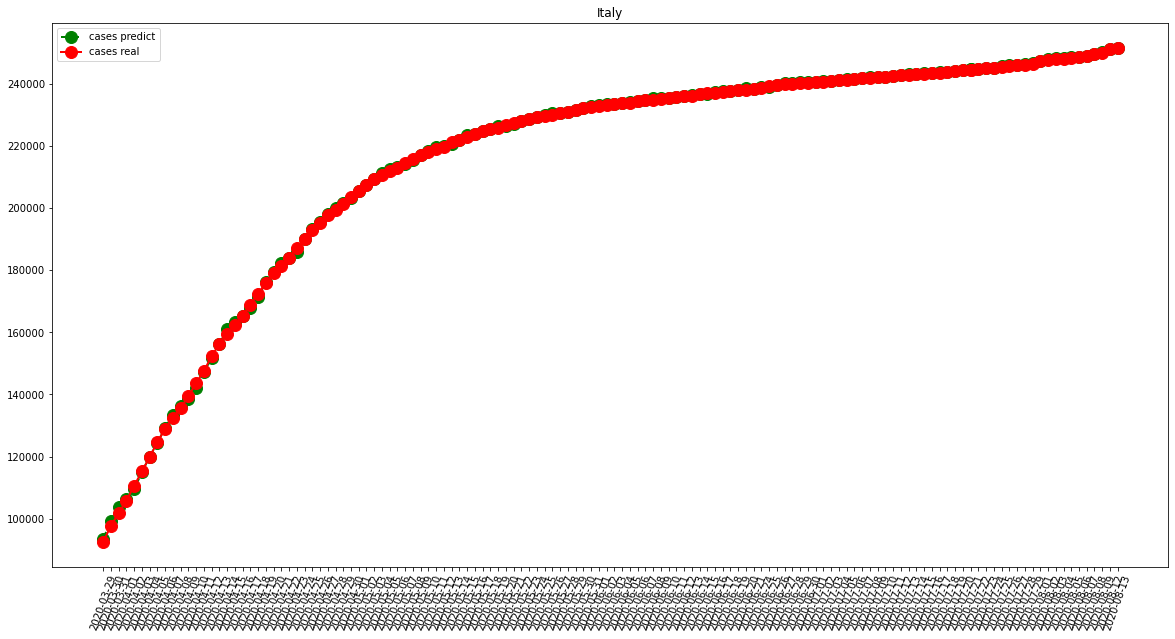

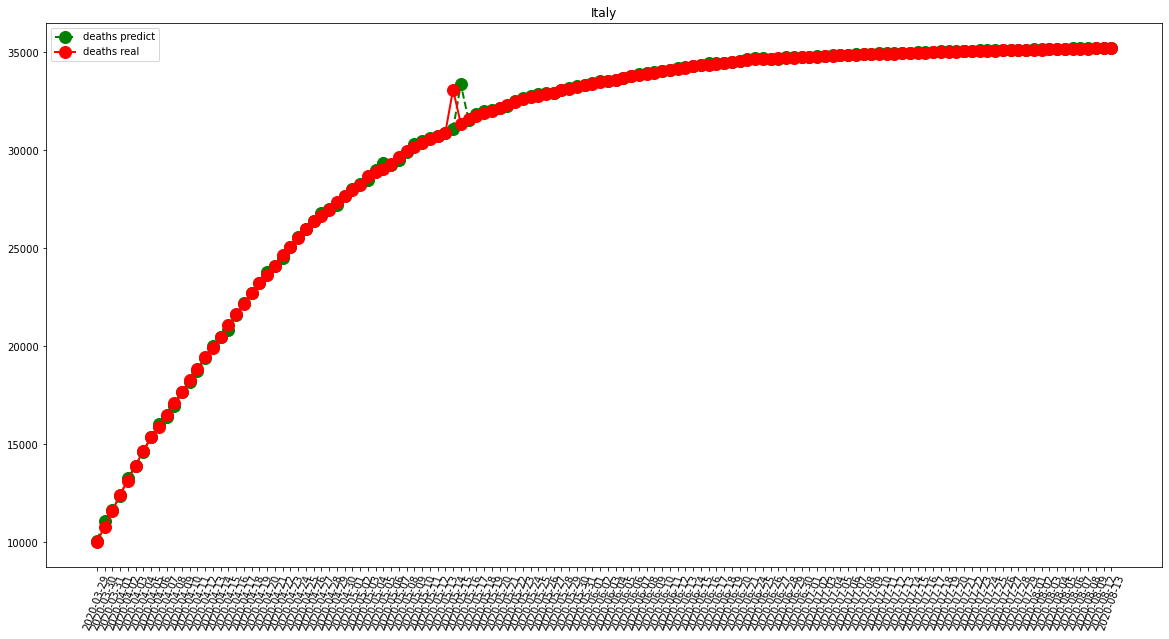

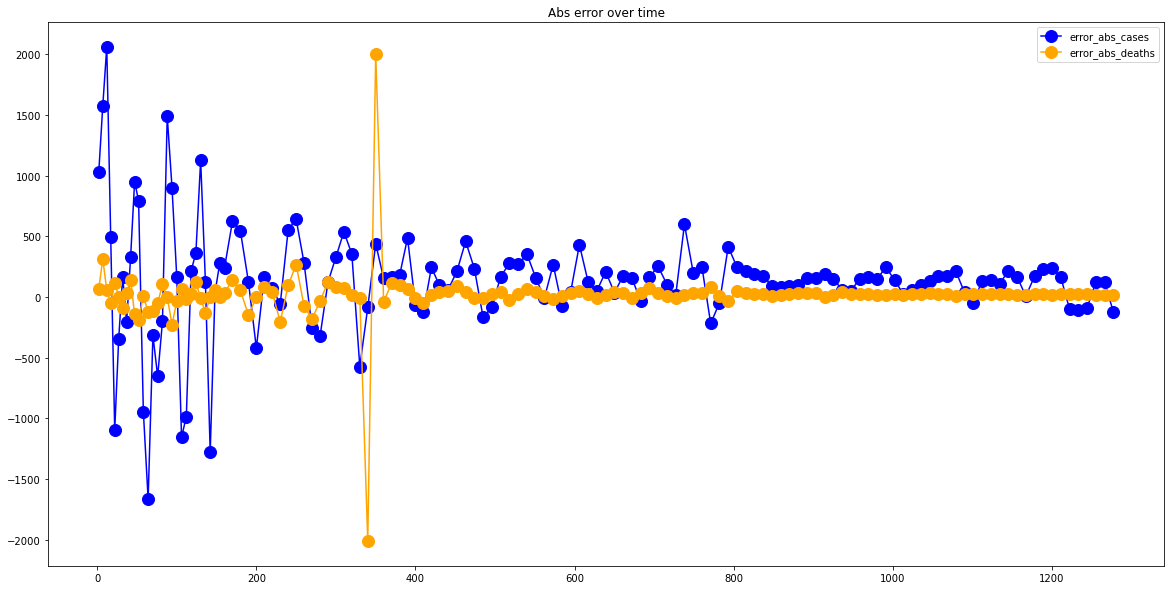

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1212.96992481203
RMSE =  2313.0459607498838
-- Spain performances for deaths --
MAE =  139.94736842105263
RMSE =  352.0526383232711


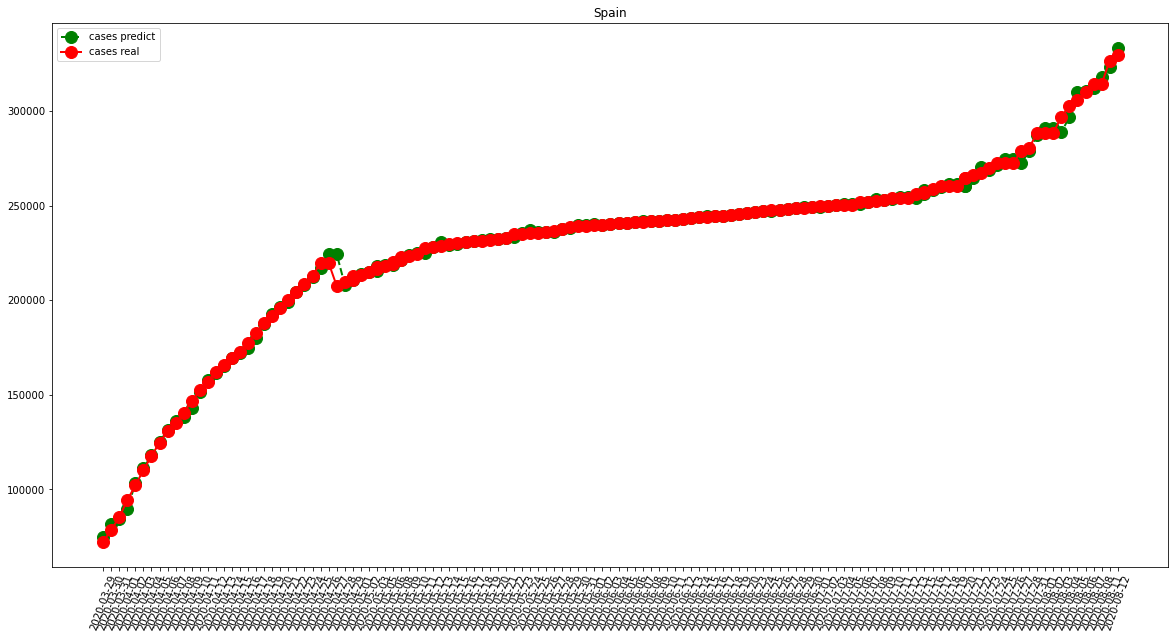

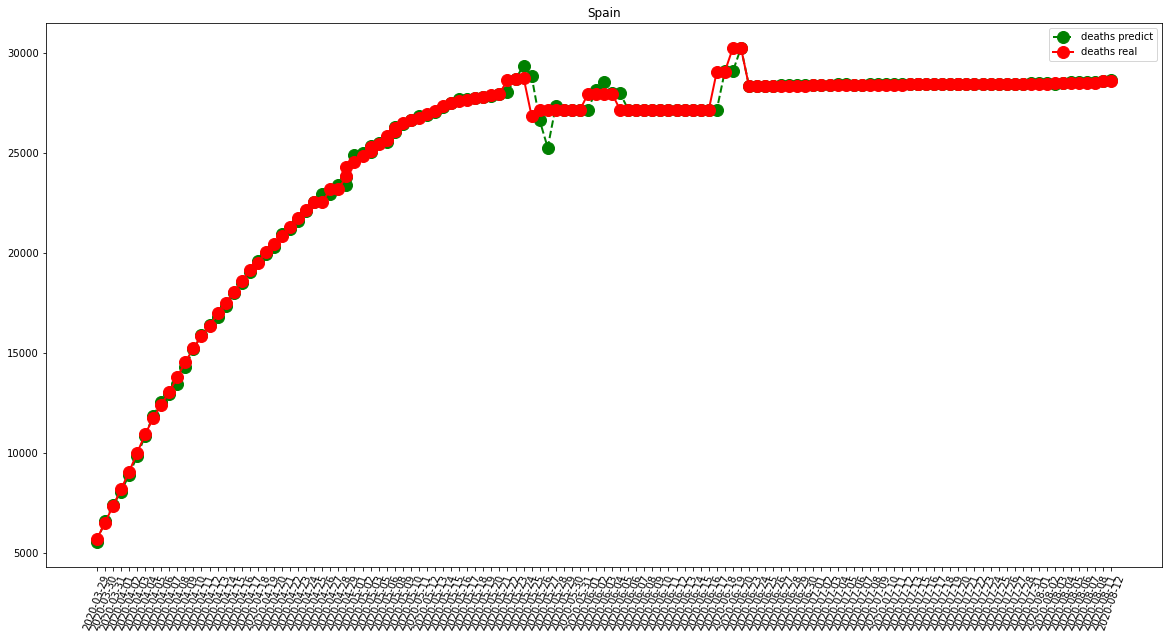

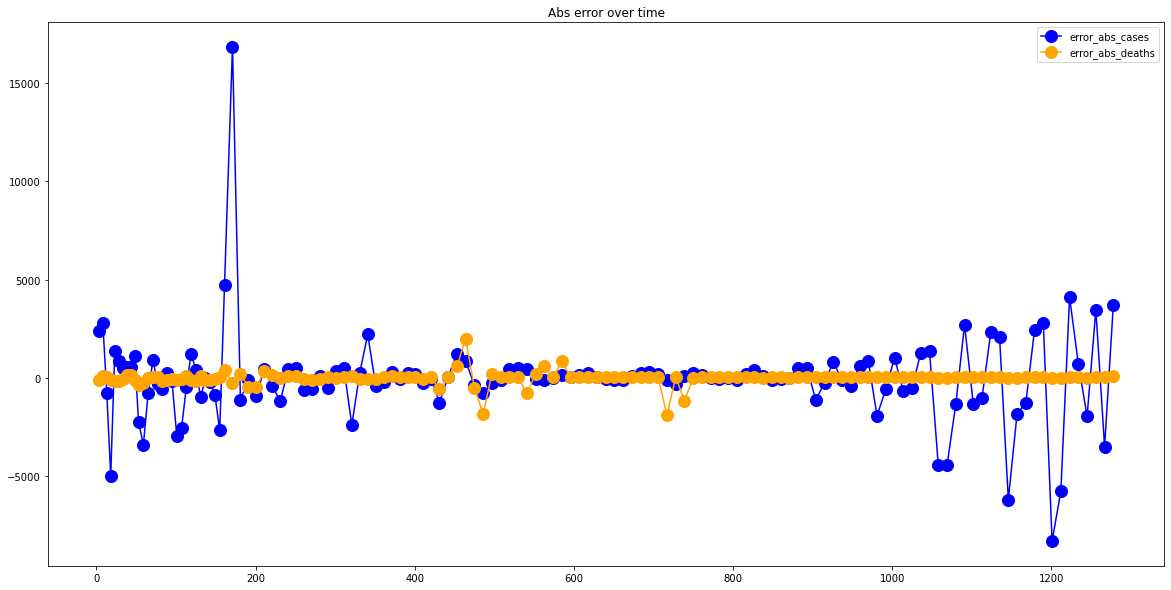

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  7594.0526315789475
RMSE =  11239.92612657339
-- United States performances for deaths --
MAE =  502.609022556391
RMSE =  716.9742447739479


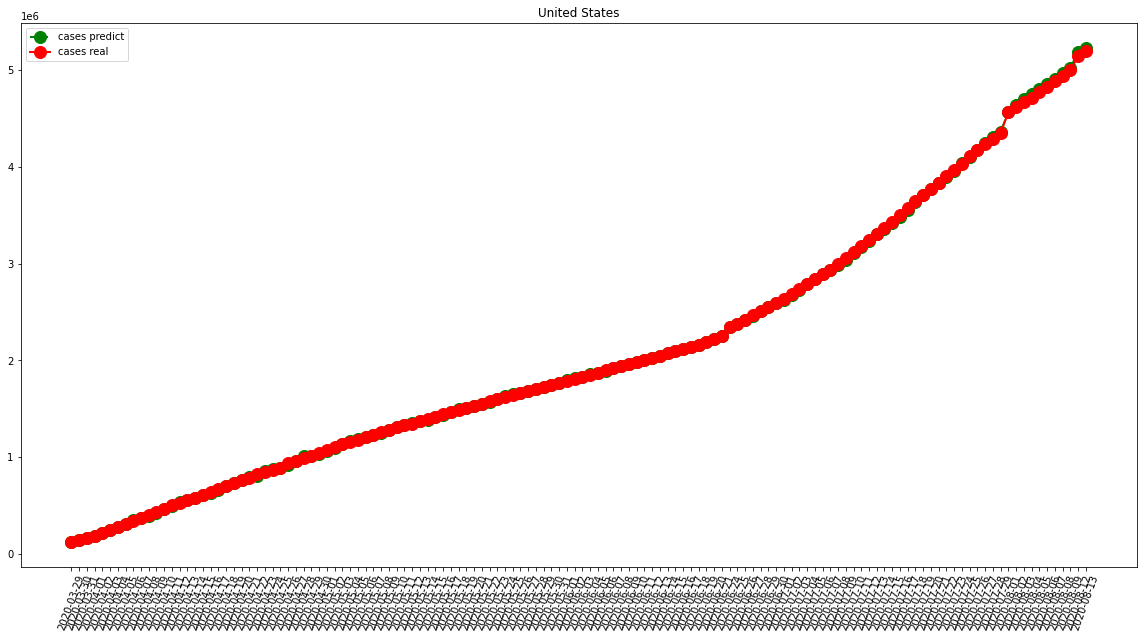

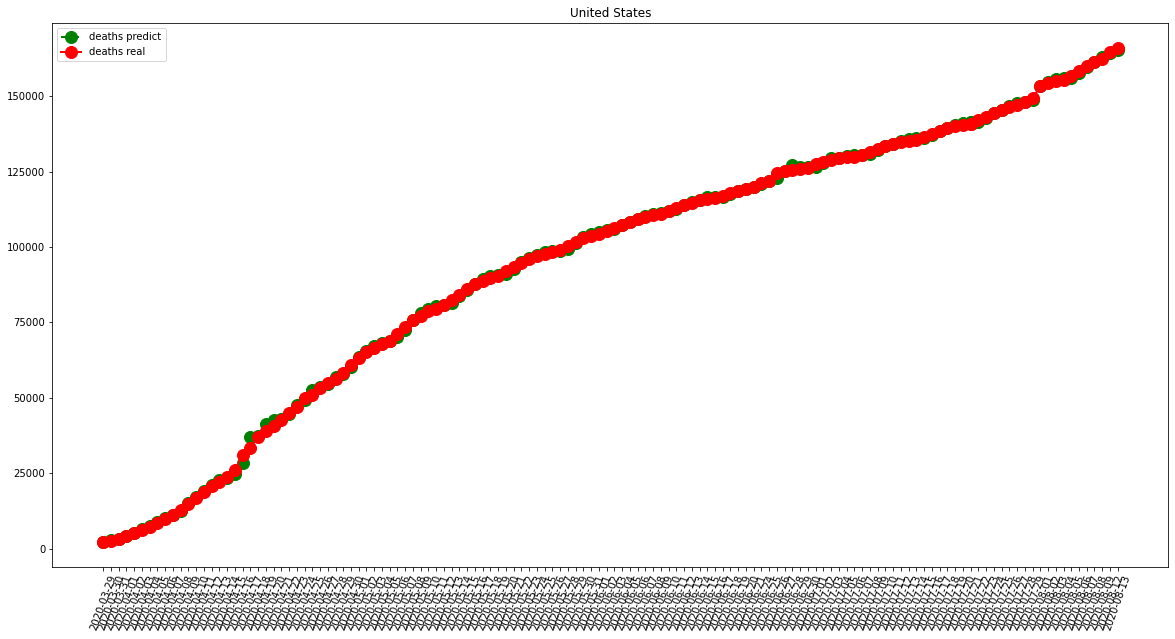

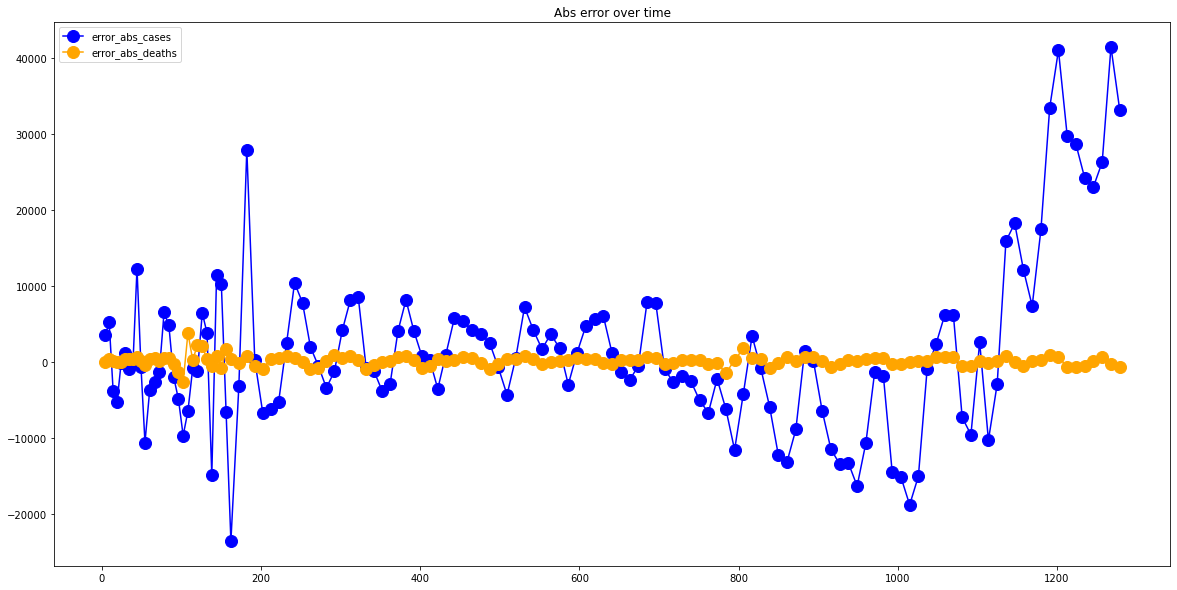

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  73.64661654135338
RMSE =  103.31385134481846
-- China performances for deaths --
MAE =  30.601503759398497
RMSE =  136.14040739734764


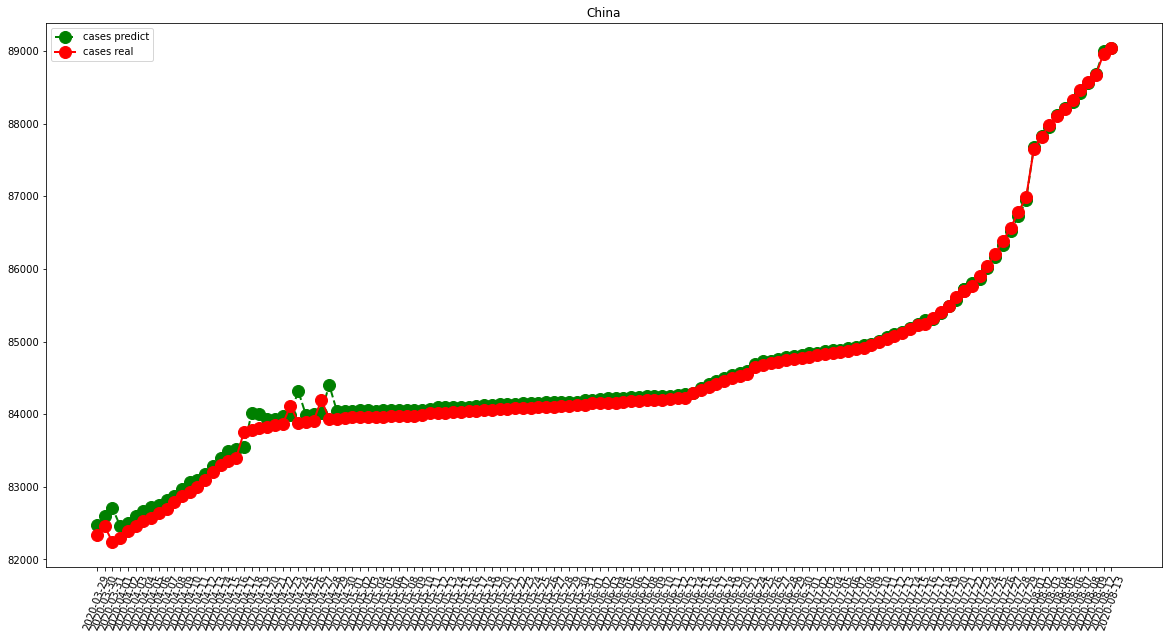

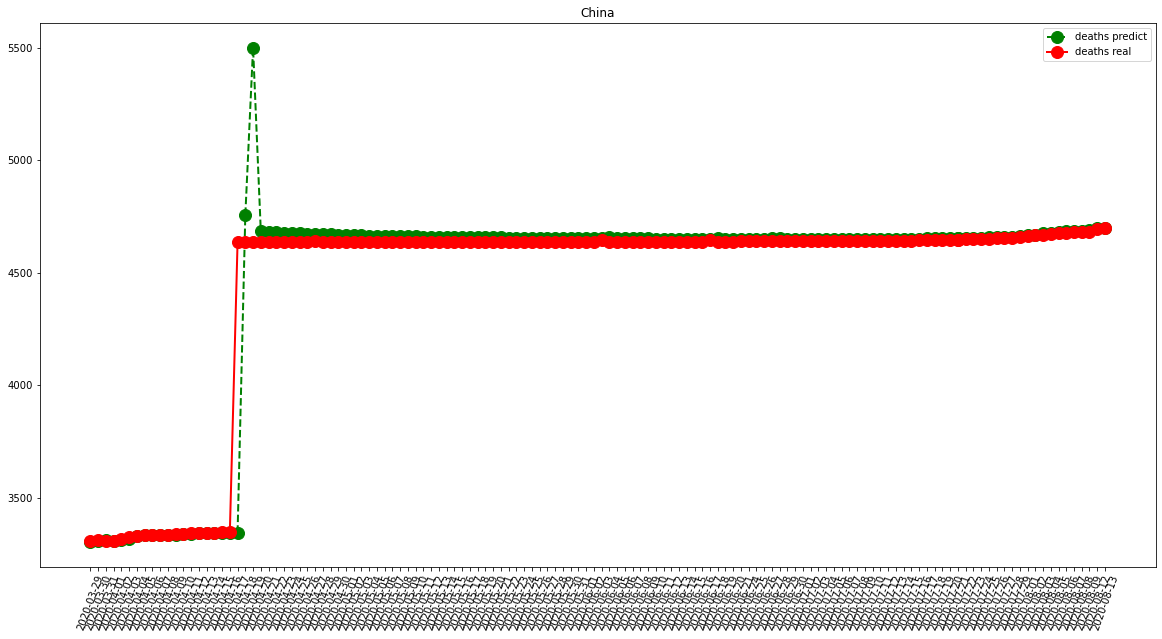

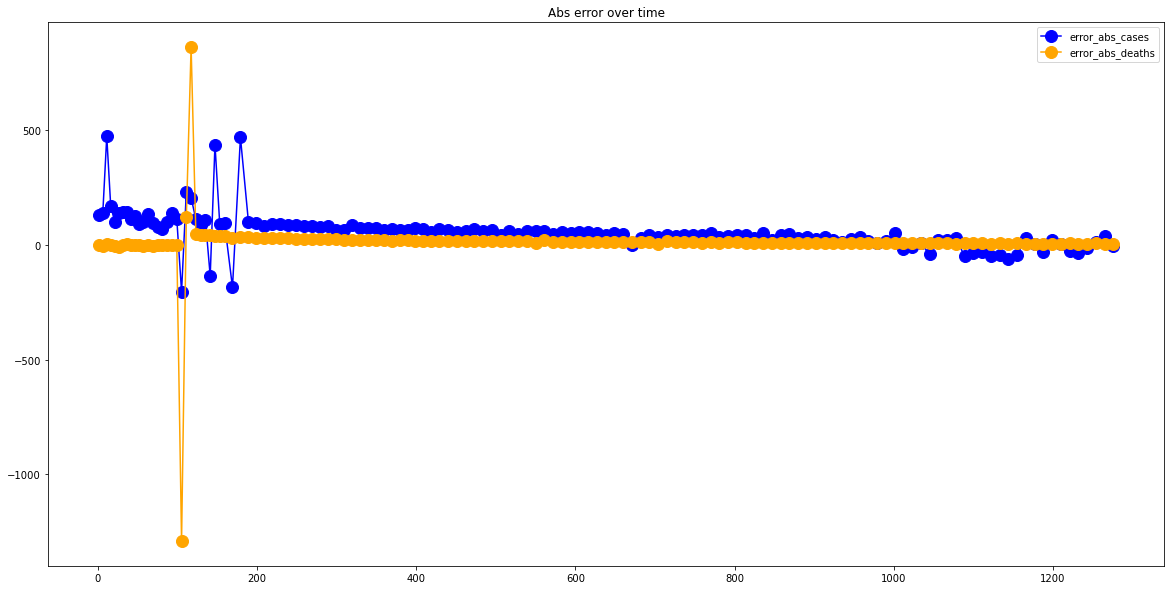

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1183.952380952381
RMSE =  4073.5530612546513
-- United Kingdom performances for deaths --
MAE =  188.40952380952382
RMSE =  479.649723384531


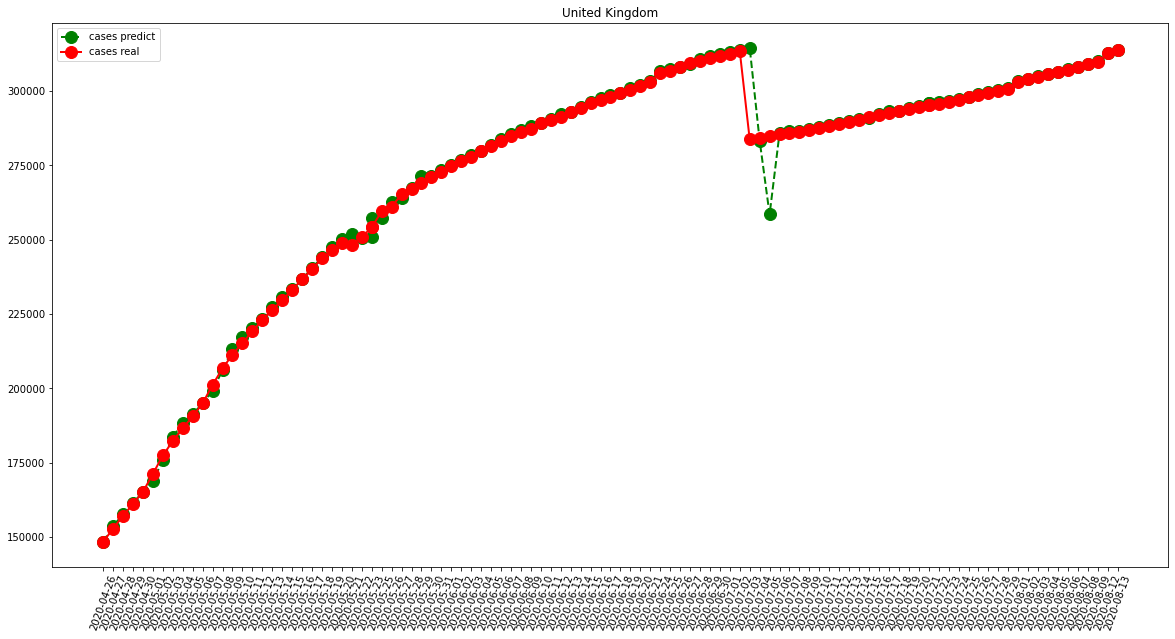

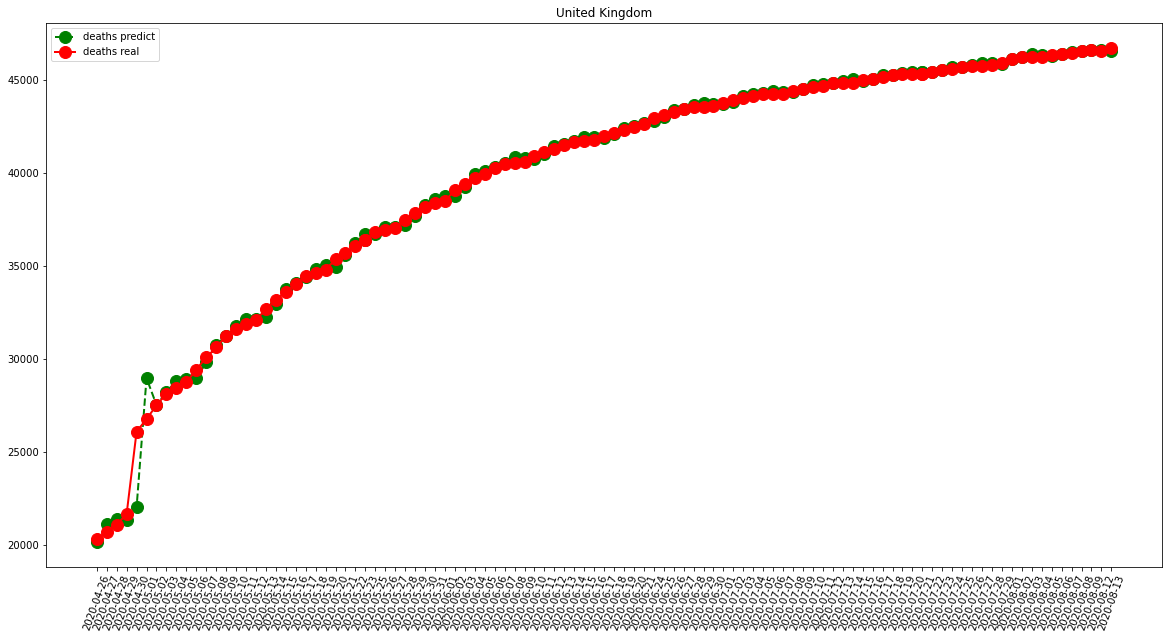

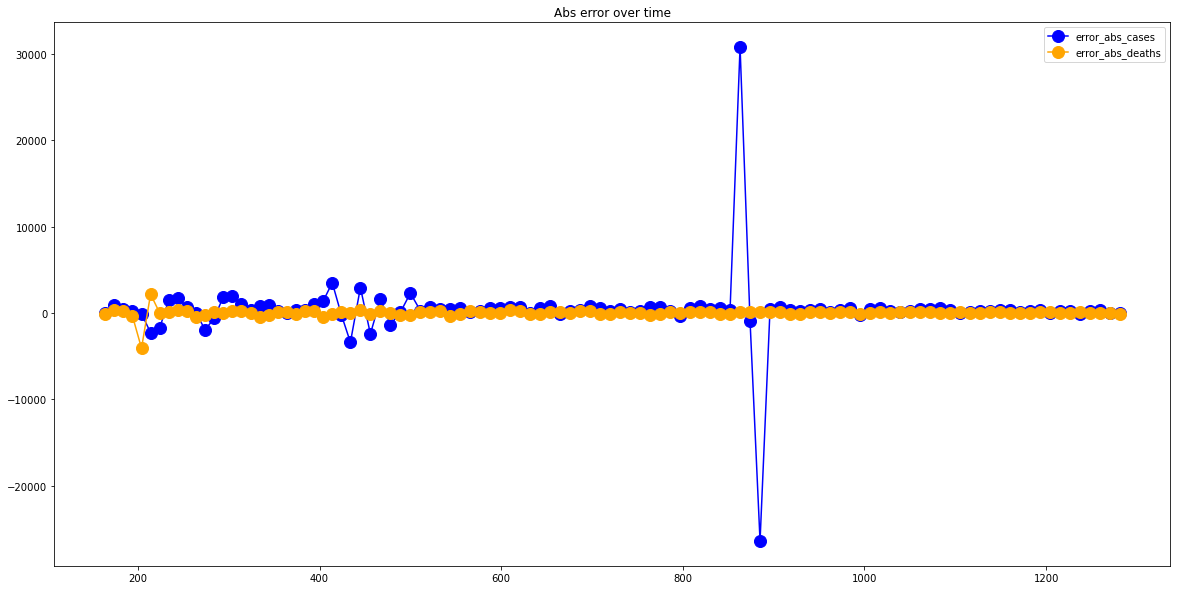

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  320.6666666666667
RMSE =  444.03348222102954
-- Germany performances for deaths --
MAE =  23.63809523809524
RMSE =  42.74687401547905


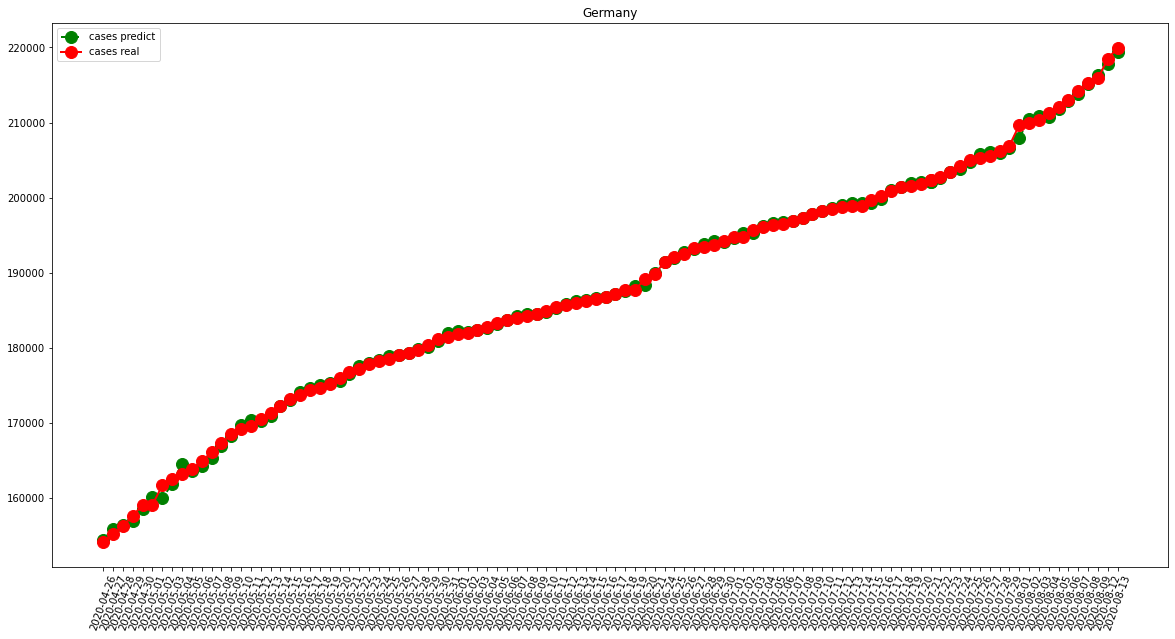

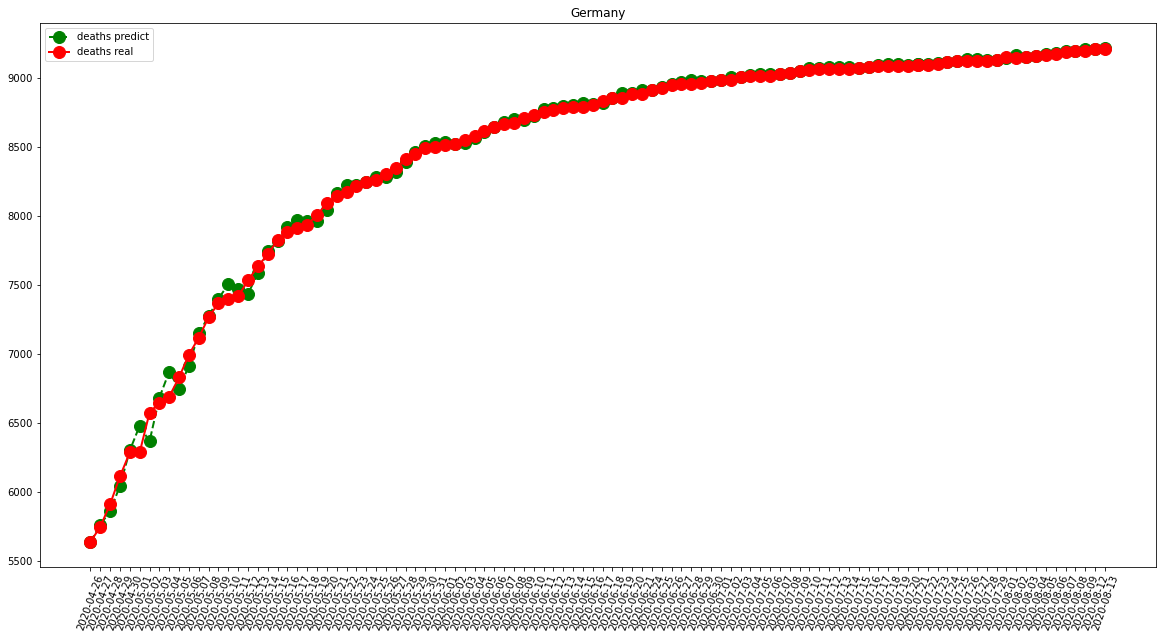

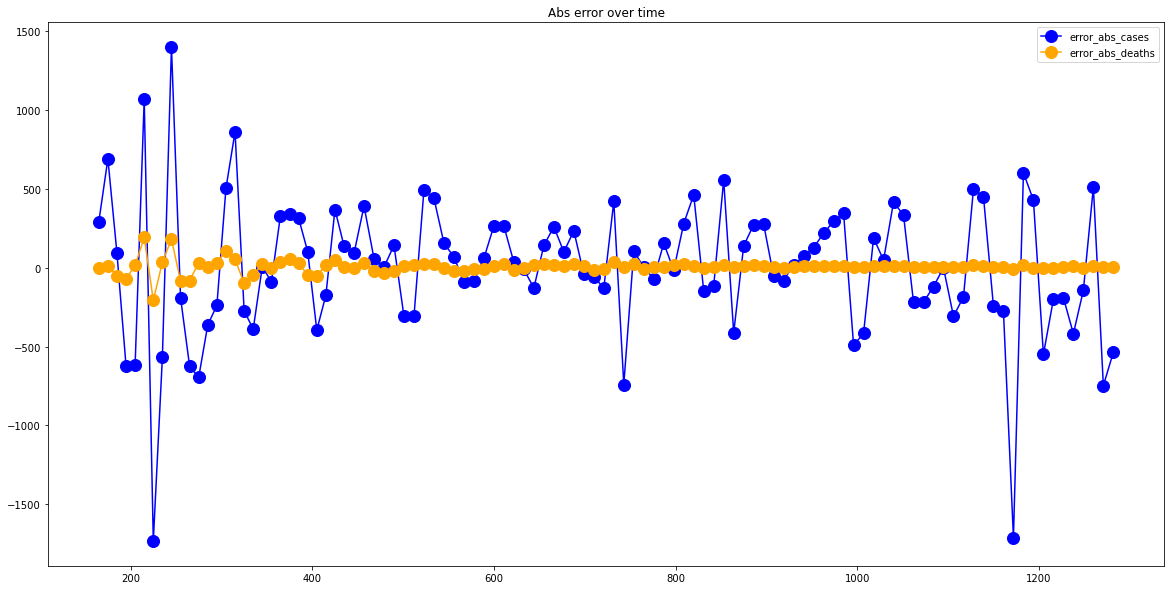

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  606.1619047619048
RMSE =  906.1134008710474
-- Iran performances for deaths --
MAE =  31.99047619047619
RMSE =  69.88105540675458


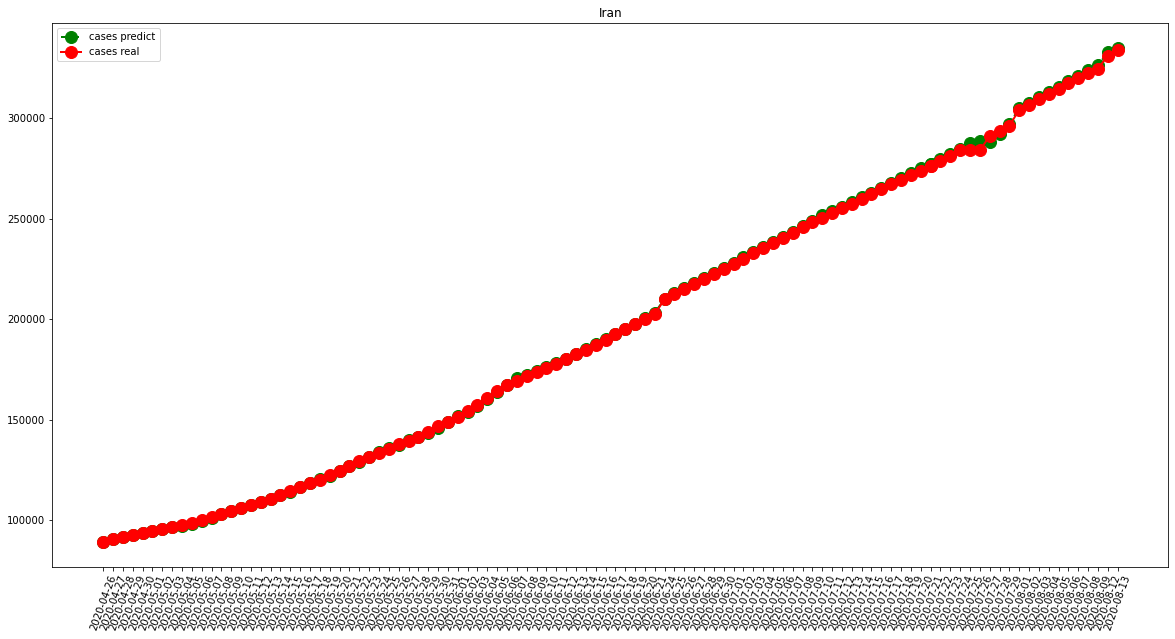

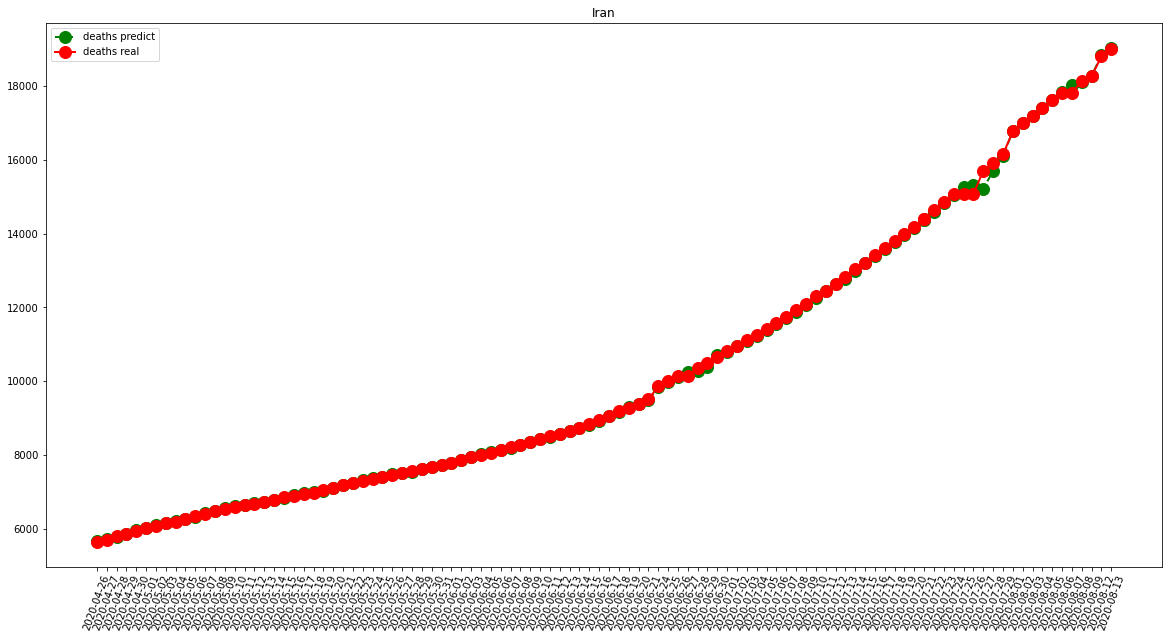

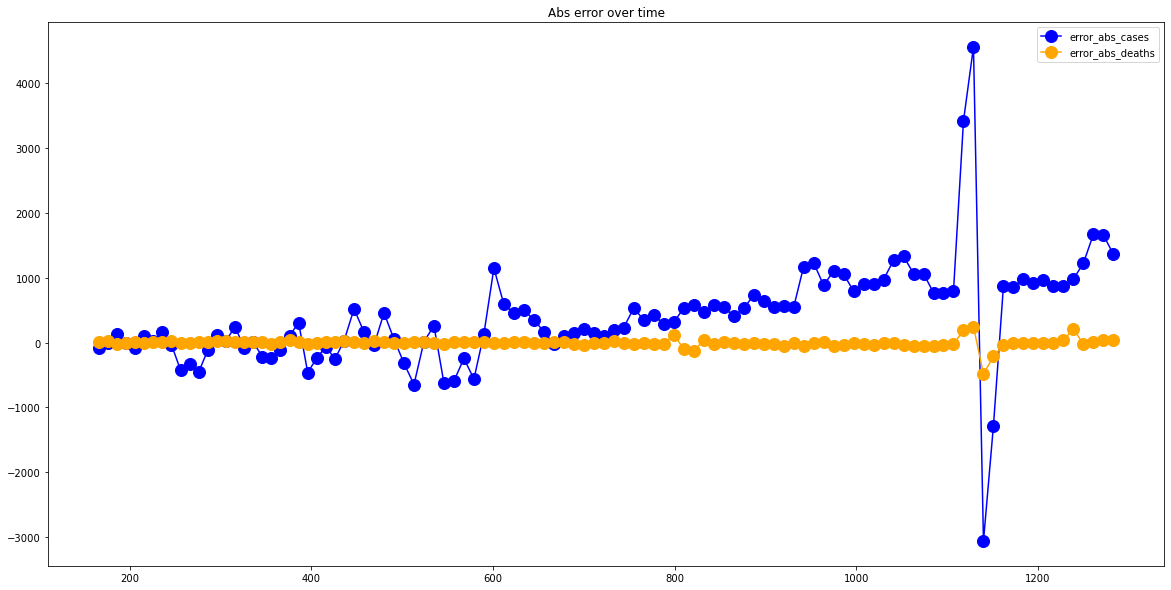

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  198.44761904761904
RMSE =  338.73438111945615
-- Turkey performances for deaths --
MAE =  18.2
RMSE =  99.06664423508046


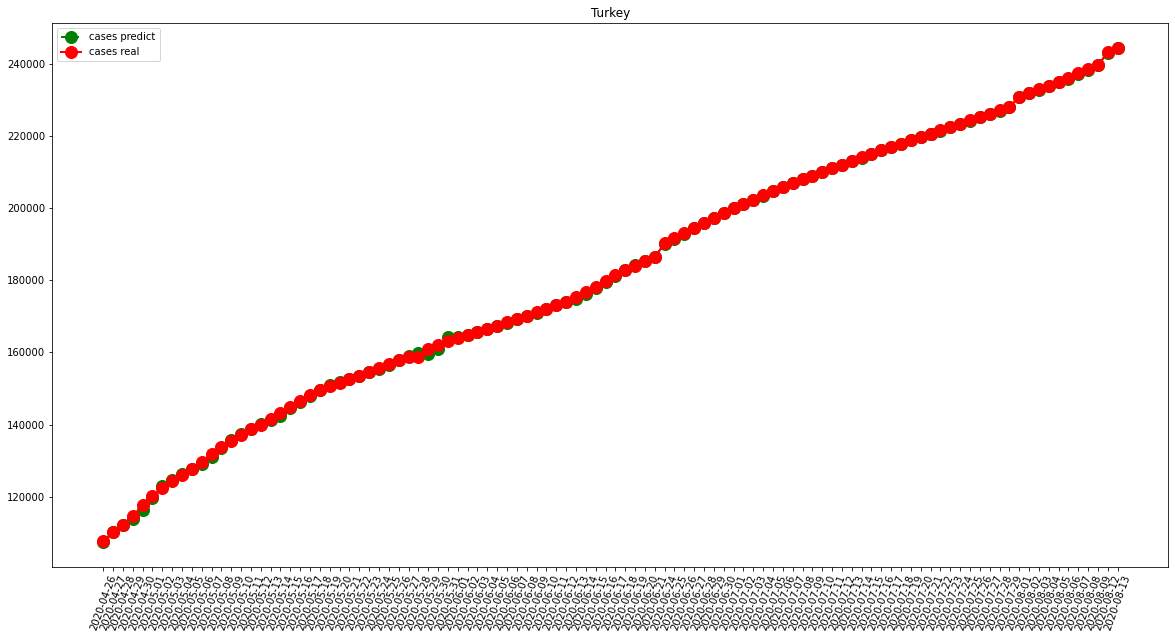

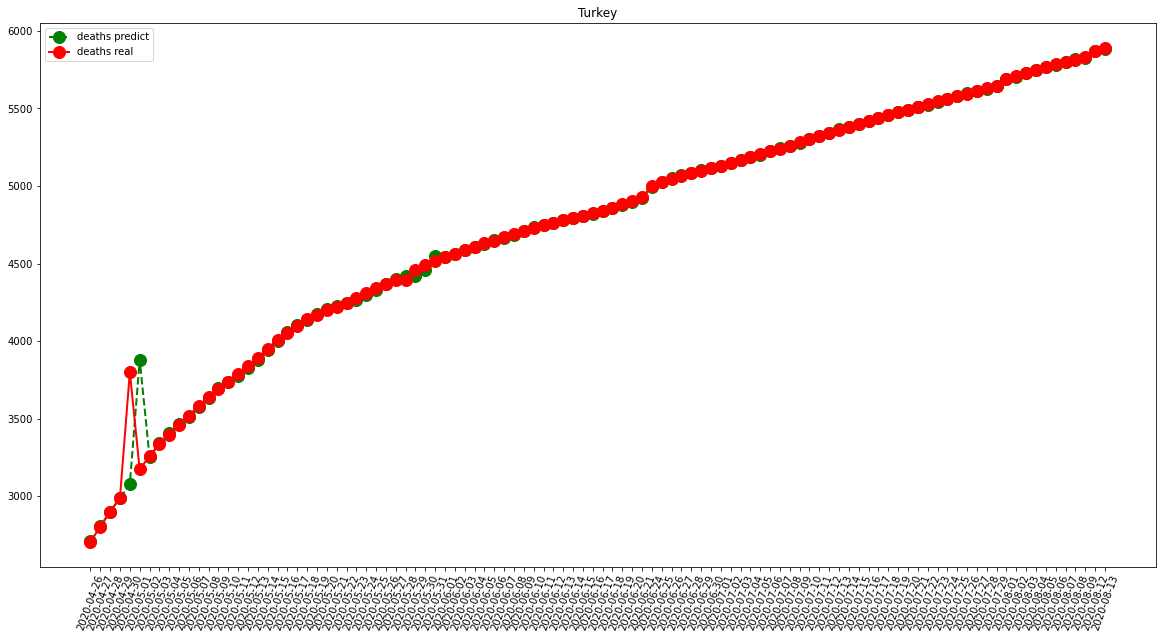

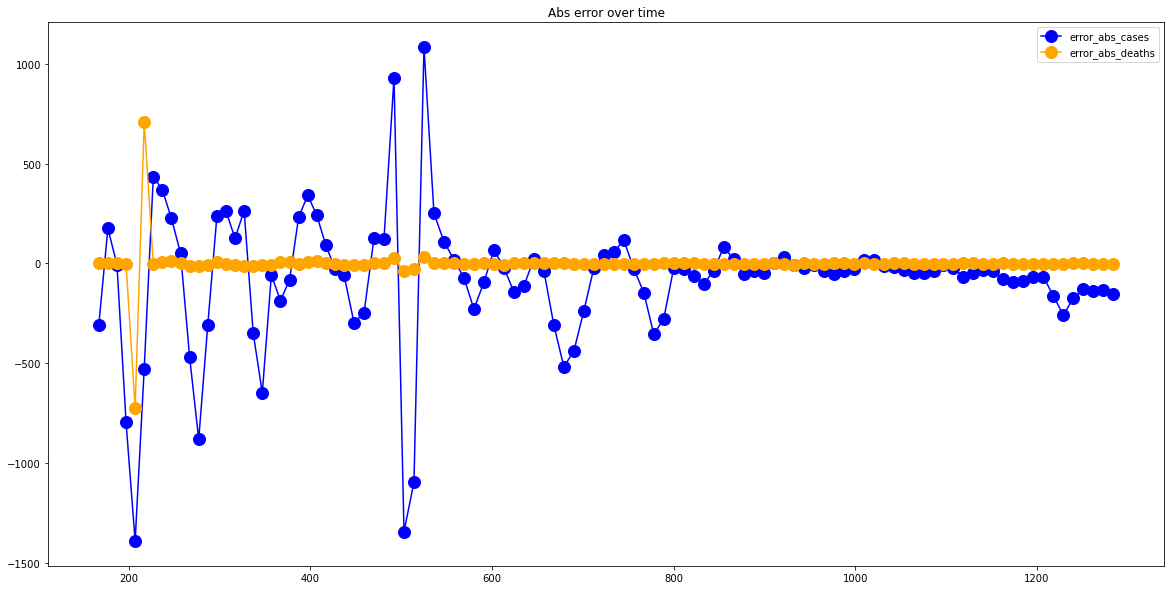

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  11799.384615384615
RMSE =  15707.736039518219
-- Brazil performances for deaths --
MAE =  395.1794871794872
RMSE =  486.86395720007124


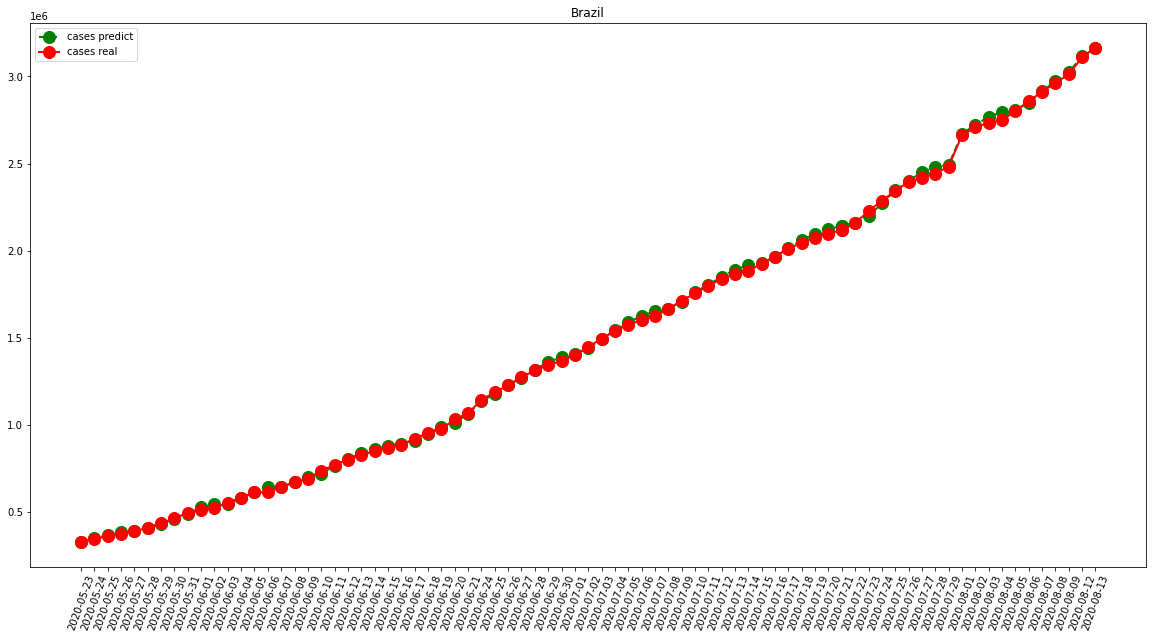

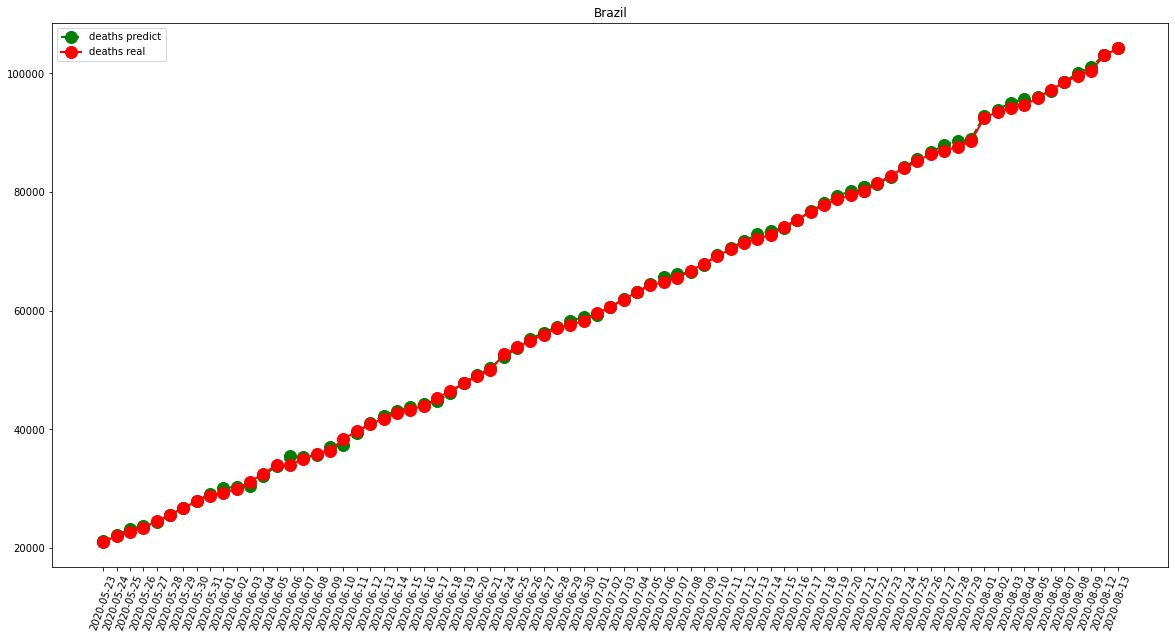

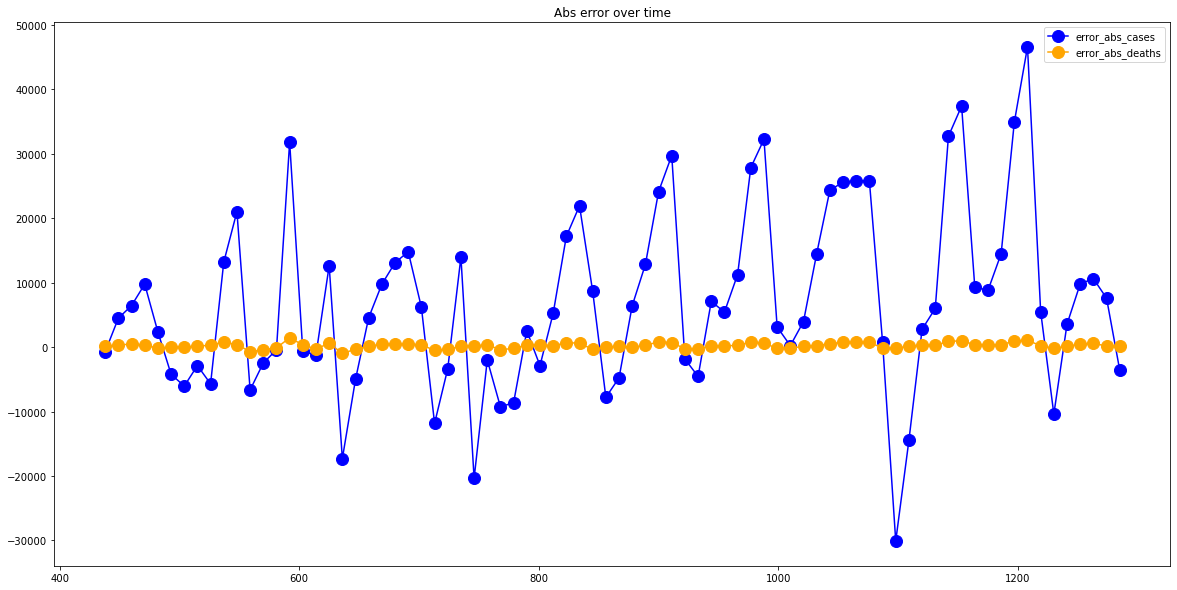

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)